### In this case, we start with Exploratory Data Analysis (EDA). We start with exploring the data-types of all the features in the dataset, then we check if there are any missing values in the dataset. We further explore the categorical features in the dataset and perform feature transformation on them to make them compatible with the result of the numerical features. Next, we do feature selection using correlation analysis. 

### Next, we train a random forest classifier on the selected features to get a baseline model. We also explore the impact of feature normalization on the model. 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

In [2]:
# Load the Drive helper and mount
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
def read_dataset(file):
    dataset = f'{file}.csv'# f'/content/drive/My Drive/software-defects/{file}.csv'  
    df = pd.read_csv(dataset)    
    return df

In [4]:
df = read_dataset('jm1')

In [5]:
# information about that dataset, including the type of columns, number of items
# per column, missing values etc. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10885 non-null  float64
 1   v(g)               10885 non-null  float64
 2   ev(g)              10885 non-null  float64
 3   iv(g)              10885 non-null  float64
 4   n                  10885 non-null  float64
 5   v                  10885 non-null  float64
 6   l                  10885 non-null  float64
 7   d                  10885 non-null  float64
 8   i                  10885 non-null  float64
 9   e                  10885 non-null  float64
 10  b                  10885 non-null  float64
 11  t                  10885 non-null  float64
 12  lOCode             10885 non-null  int64  
 13  lOComment          10885 non-null  int64  
 14  lOBlank            10885 non-null  int64  
 15  locCodeAndComment  10885 non-null  int64  
 16  uniq_Op            108

In [6]:
# notice the statistics are for columns with int/float values. 
df.describe()

loc          v(g)         ev(g)         iv(g)             n  \
count  10885.000000  10885.000000  10885.000000  10885.000000  10885.000000   
mean      42.016178      6.348590      3.401047      4.001599    114.389738   
std       76.593332     13.019695      6.771869      9.116889    249.502091   
min        1.000000      1.000000      1.000000      1.000000      0.000000   
25%       11.000000      2.000000      1.000000      1.000000     14.000000   
50%       23.000000      3.000000      1.000000      2.000000     49.000000   
75%       46.000000      7.000000      3.000000      4.000000    119.000000   
max     3442.000000    470.000000    165.000000    402.000000   8441.000000   

                  v             l             d             i             e  \
count  10885.000000  10885.000000  10885.000000  10885.000000  1.088500e+04   
mean     673.758017      0.135335     14.177237     29.439544  3.683637e+04   
std     1938.856196      0.160538     18.709900     34.418313  4.343678e+05   
min        0.000000      0.000000      0.000000      0.000000  0.000000e+00   
25%       48.430000      0.030000      3.000000     11.860000  1.619400e+02   
50%      217.130000      0.080000      9.090000     21.930000  2.031020e+03   
75%      621.480000      0.160000     18.900000     36.780000  1.141643e+04   
max    80843.080000      1.300000    418.200000    569.780000  3.107978e+07   

                  b             t        lOCode     lOComment      lOBlank  \
count  10885.000000  1.088500e+04  10885.000000  10885.000000  10885.00000   
mean       0.224766  2.046465e+03     26.252274      2.737529      4.62554   
std        0.646408  2.413154e+04     59.611201      9.008608      9.96813   
min        0.000000  0.000000e+00      0.000000      0.000000      0.00000   
25%        0.020000  9.000000e+00      4.000000      0.000000      0.00000   
50%        0.070000  1.128300e+02     13.000000      0.000000      2.00000   
75%        0.210000  6.342500e+02     28.000000      2.000000      5.00000   
max       26.950000  1.726655e+06   2824.000000    344.000000    447.00000   

       locCodeAndComment  
count       10885.000000  
mean            0.370785  
std             1.907969  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max           108.000000

In [7]:
cat_features = ['uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount', ]

In [8]:
int_features = ['lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', ]

In [9]:
df.uniq_Op.unique()

array(['1.2', '1', '17', '11', '14', '0', '4', '19', '32', '7', '26',
       '27', '21', '9', '28', '22', '16', '8', '20', '10', '13', '25',
       '12', '5', '34', '15', '6', '18', '24', '30', '?', '23', '3', '38',
       '29', '33', '39', '45', '31', '58', '37', '49', '48', '410', '35',
       '36', '42', '40', '46', '44', '41', '52', '74', '280', '65', '73',
       '61', '78', '172', '105', '102', '98', '411', '155', '2', '55',
       '43', '47', '99'], dtype=object)

In [10]:
# df['lOComment']

In [11]:
df[cat_features].head()

uniq_Op uniq_Opnd total_Op total_Opnd branchCount
0     1.2       1.2      1.2        1.2         1.4
1       1         1        1          1           1
2      17        36      112         86          13
3      17       135      329        271           5
4      11        16       76         50           7

In [12]:
for f in cat_features:
  print(f"feature: {f}")
  print(f"Unique values: {df[f].unique()}")
  print('\n')

feature: uniq_Op
Unique values: ['1.2' '1' '17' '11' '14' '0' '4' '19' '32' '7' '26' '27' '21' '9' '28'
 '22' '16' '8' '20' '10' '13' '25' '12' '5' '34' '15' '6' '18' '24' '30'
 '?' '23' '3' '38' '29' '33' '39' '45' '31' '58' '37' '49' '48' '410' '35'
 '36' '42' '40' '46' '44' '41' '52' '74' '280' '65' '73' '61' '78' '172'
 '105' '102' '98' '411' '155' '2' '55' '43' '47' '99']


feature: uniq_Opnd
Unique values: ['1.2' '1' '36' '135' '16' '24' '0' '5' '12' '23' '4' '64' '10' '47' '59'
 '56' '113' '25' '103' '29' '44' '21' '28' '7' '15' '57' '63' '53' '6'
 '76' '51' '30' '17' '8' '19' '18' '52' '32' '20' '40' '22' '86' '3' '78'
 '14' '11' '68' '38' '9' '13' '42' '67' '49' '?' '43' '34' '27' '33' '45'
 '26' '48' '46' '35' '87' '101' '104' '165' '126' '75' '112' '62' '77'
 '162' '31' '138' '80' '160' '58' '69' '60' '70' '2' '50' '71' '175' '39'
 '37' '54' '73' '65' '41' '66' '85' '95' '74' '94' '102' '88' '147' '117'
 '84' '55' '81' '132' '61' '140' '96' '90' '146' '806' '154' '110' '241'

In [13]:
df = df[df['uniq_Op']!='?']

In [14]:
df.to_csv('data_cleaned.csv', index=False)

In [15]:
 # we will convert the categorical features into numerical features for 
# easier manupilcation
for f in cat_features:
  print(f)
  df[f] = pd.to_numeric(df[f])#df[f].astype(int)

uniq_Op
uniq_Opnd
total_Op
total_Opnd
branchCount


In [16]:
df.to_csv('data_all_numeric.csv', index=False)

Seems like there are no missing values in the dataset, therefore we will not check for missing/None values. 


In [17]:
# notice the statistics are for columns with int/float values. 
df.describe()

loc          v(g)         ev(g)         iv(g)             n  \
count  10880.000000  10880.000000  10880.000000  10880.000000  10880.000000   
mean      42.020138      6.347739      3.400037      4.001415    114.391388   
std       76.608641     13.021924      6.772697      9.118682    249.549291   
min        1.000000      1.000000      1.000000      1.000000      0.000000   
25%       11.000000      2.000000      1.000000      1.000000     14.000000   
50%       23.000000      3.000000      1.000000      2.000000     49.000000   
75%       46.000000      7.000000      3.000000      4.000000    119.000000   
max     3442.000000    470.000000    165.000000    402.000000   8441.000000   

                  v             l             d            i             e  \
count  10880.000000  10880.000000  10880.000000  10880.00000  1.088000e+04   
mean     673.772003      0.135352     14.177339     29.43885  3.684563e+04   
std     1939.253379      0.160552     18.712325     34.42332  4.344671e+05   
min        0.000000      0.000000      0.000000      0.00000  0.000000e+00   
25%       48.430000      0.030000      3.000000     11.86000  1.619400e+02   
50%      217.130000      0.080000      9.090000     21.92500  2.031020e+03   
75%      620.850000      0.160000     18.902500     36.78000  1.141614e+04   
max    80843.080000      1.300000    418.200000    569.78000  3.107978e+07   

       ...             t        lOCode     lOComment       lOBlank  \
count  ...  1.088000e+04  10880.000000  10880.000000  10880.000000   
mean   ...  2.046980e+03     26.253125      2.738787      4.625092   
std    ...  2.413706e+04     59.622819      9.010486      9.969914   
min    ...  0.000000e+00      0.000000      0.000000      0.000000   
25%    ...  9.000000e+00      4.000000      0.000000      0.000000   
50%    ...  1.128300e+02     13.000000      0.000000      2.000000   
75%    ...  6.342350e+02     28.000000      2.000000      5.000000   
max    ...  1.726655e+06   2824.000000    344.000000    447.000000   

       locCodeAndComment       uniq_Op     uniq_Opnd      total_Op  \
count       10880.000000  10880.000000  10880.000000  10880.000000   
mean            0.370956     11.177592     16.751857     68.110588   
std             1.908391     10.045255     26.667883    151.513836   
min             0.000000      0.000000      0.000000      0.000000   
25%             0.000000      5.000000      4.000000      8.000000   
50%             0.000000     11.000000     11.000000     29.000000   
75%             0.000000     16.000000     21.000000     71.000000   
max           108.000000    411.000000   1026.000000   5420.000000   

         total_Opnd   branchCount  
count  10880.000000  10880.000000  
mean      46.388989     11.292316  
std      100.351845     22.597617  
min        0.000000      1.000000  
25%        6.000000      3.000000  
50%       19.000000      5.000000  
75%       48.000000     13.000000  
max     3021.000000    826.000000  

[8 rows x 21 columns]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10880 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10880 non-null  float64
 1   v(g)               10880 non-null  float64
 2   ev(g)              10880 non-null  float64
 3   iv(g)              10880 non-null  float64
 4   n                  10880 non-null  float64
 5   v                  10880 non-null  float64
 6   l                  10880 non-null  float64
 7   d                  10880 non-null  float64
 8   i                  10880 non-null  float64
 9   e                  10880 non-null  float64
 10  b                  10880 non-null  float64
 11  t                  10880 non-null  float64
 12  lOCode             10880 non-null  int64  
 13  lOComment          10880 non-null  int64  
 14  lOBlank            10880 non-null  int64  
 15  locCodeAndComment  10880 non-null  int64  
 16  uniq_Op            108

Now getting the class labels for the dataset. 

In [19]:
defects_true_false = df.groupby('defects')['b'].apply(lambda x: x.count()) #defect rates (true/false)
print('False : ' , defects_true_false[0])
print('True : ' , defects_true_false[1])

False :  8777
True :  2103


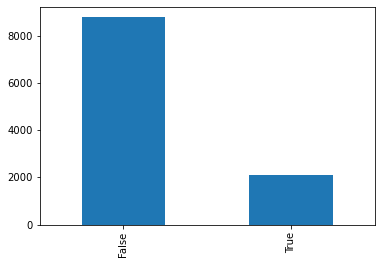

In [20]:
df.defects.value_counts().plot(kind='bar')

In [21]:
# check if there are any missing values. If there are, then we need to replace them 
# or remove them. 
df.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

Since there are no missing values, therefor, we will not perform any replacement or removal of those samples/columns

## Remove highly correlated features

We perform a correlation analysis on the numberical feature to identify which features are correlated among themselves. We can safely remove one of the correlated features without impacting the performance of our model. 

In [22]:
# get the correlation plot. 

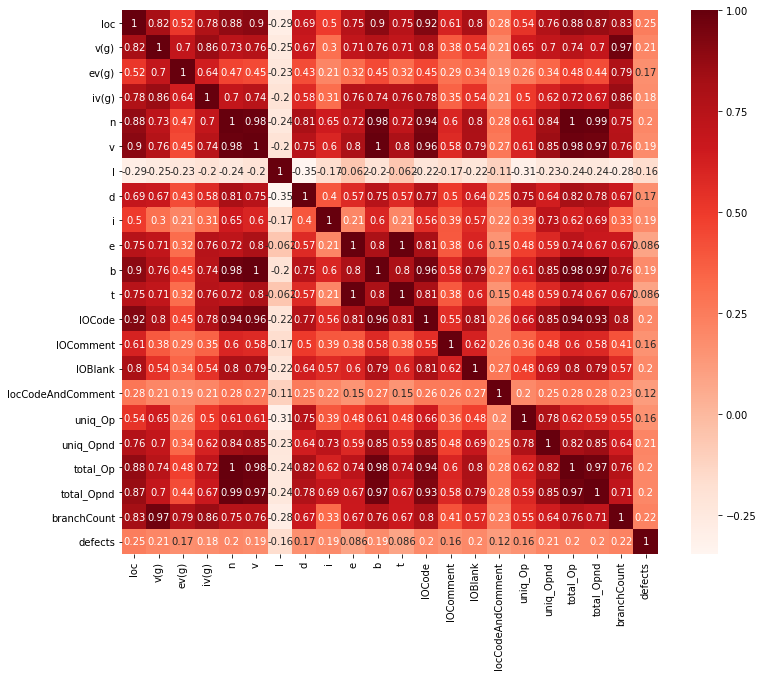

In [23]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [24]:
def drop_corr_features(df):
    cor_matrix = df.corr().abs()
    upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
    return df.drop(columns=to_drop)

In [25]:
df1 = drop_corr_features(df)

In [26]:
df1

loc  v(g)  ev(g)  iv(g)      n     l      d       i         e  \
0        1.1   1.4    1.4    1.4    1.3  1.30   1.30    1.30      1.30   
1        1.0   1.0    1.0    1.0    1.0  1.00   1.00    1.00      1.00   
2       72.0   7.0    1.0    6.0  198.0  0.05  20.31   55.85  23029.10   
3      190.0   3.0    1.0    3.0  600.0  0.06  17.06  254.87  74202.67   
4       37.0   4.0    1.0    4.0  126.0  0.06  17.19   34.86  10297.30   
...      ...   ...    ...    ...    ...   ...    ...     ...       ...   
10880   18.0   4.0    1.0    4.0   52.0  0.14   7.33   32.93   1770.86   
10881    9.0   2.0    1.0    2.0   30.0  0.12   8.25   15.72   1069.68   
10882   42.0   4.0    1.0    2.0  103.0  0.04  26.40   19.68  13716.72   
10883   10.0   1.0    1.0    1.0   36.0  0.12   8.44   17.44   1241.57   
10884   19.0   3.0    1.0    1.0   58.0  0.09  11.57   23.56   3154.67   

       lOComment  lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  defects  
0              2        2                  2      1.2        1.2    False  
1              1        1                  1      1.0        1.0     True  
2             10        8                  1     17.0       36.0     True  
3             29       28                  2     17.0      135.0     True  
4              1        6                  0     11.0       16.0     True  
...          ...      ...                ...      ...        ...      ...  
10880          0        2                  0     10.0       15.0    False  
10881          0        2                  0     12.0        8.0    False  
10882          1       10                  0     18.0       15.0    False  
10883          0        2                  0      9.0        8.0    False  
10884          0        2                  1     12.0       14.0    False  

[10880 rows x 15 columns]

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10880 entries, 0 to 10884
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10880 non-null  float64
 1   v(g)               10880 non-null  float64
 2   ev(g)              10880 non-null  float64
 3   iv(g)              10880 non-null  float64
 4   n                  10880 non-null  float64
 5   l                  10880 non-null  float64
 6   d                  10880 non-null  float64
 7   i                  10880 non-null  float64
 8   e                  10880 non-null  float64
 9   lOComment          10880 non-null  int64  
 10  lOBlank            10880 non-null  int64  
 11  locCodeAndComment  10880 non-null  int64  
 12  uniq_Op            10880 non-null  float64
 13  uniq_Opnd          10880 non-null  float64
 14  defects            10880 non-null  bool   
dtypes: bool(1), float64(11), int64(3)
memory usage: 1.3 MB


In [28]:
# Model selection

In [29]:
X = df1.drop(columns=['defects'])
Y = df['defects']

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import model_selection

In [31]:
from sklearn.model_selection import train_test_split
YY = ['Defect' if y else 'None_Defect' for y in Y]
X_train, X_test, y_train, y_test = train_test_split(X, YY, test_size = 0.2, random_state = 0)

# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# #Summary of the predictions made by the classifier
# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))
# #Accuracy score
# from sklearn.metrics import accuracy_score
# print("ACC: ",accuracy_score(y_pred,y_test))

In [32]:
# Let's load the packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
# import shap
from matplotlib import pyplot as plt

### Train a RF model to get feature importance

In [33]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
rf.feature_importances_

array([0.15375972, 0.07842187, 0.04848188, 0.0637286 , 0.08788566,
       0.03744884, 0.08188958, 0.09267364, 0.09433792, 0.04257559,
       0.06746526, 0.02068562, 0.05767438, 0.07297144])

<BarContainer object of 14 artists>

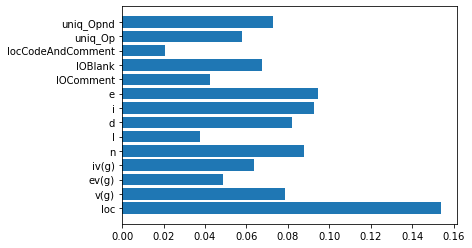

In [35]:
plt.barh(X_train.keys(), rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

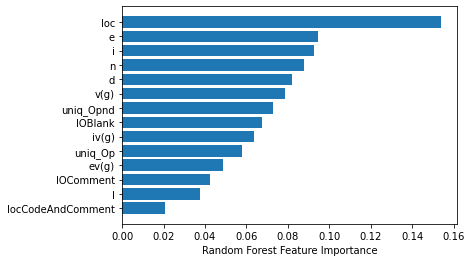

In [36]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X_train.keys()[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [37]:
rf.feature_importances_[sorted_idx]

array([0.02068562, 0.03744884, 0.04257559, 0.04848188, 0.05767438,
       0.0637286 , 0.06746526, 0.07297144, 0.07842187, 0.08188958,
       0.08788566, 0.09267364, 0.09433792, 0.15375972])

In [38]:
# use features with importance greater than 0.06
idex  = rf.feature_importances_[sorted_idx]>0.06

In [39]:
X_train[X_train.keys()[sorted_idx][idex].values]

iv(g)  lOBlank  uniq_Opnd  v(g)      d      n       i          e    loc
2182     2.0        5       32.0   3.0   9.38  106.0   61.73    5425.31   31.0
8848     6.0        5       30.0  12.0  36.40  222.0   35.10   46504.09   63.0
3756     5.0        4       17.0   5.0  19.59   98.0   25.66    9846.41   22.0
10526    4.0        1      118.0   4.0  17.54  600.0  241.31   74259.84  100.0
2058    10.0       42       56.0  70.0  48.12  878.0  112.95  261494.78  202.0
...      ...      ...        ...   ...    ...    ...     ...        ...    ...
4863     1.0        0        0.0   1.0   0.00    0.0    0.00       0.00   15.0
3267     8.0        0        0.0   8.0   0.00    0.0    0.00       0.00   42.0
9850     1.0        0        5.0   1.0   3.50   16.0   15.19     186.03    4.0
10804    1.0        0        4.0   1.0   2.50   10.0   12.68      79.25    5.0
2735     2.0       15       18.0   7.0  26.50  124.0   24.19   16988.37   66.0

[8704 rows x 9 columns]

### Random Forest: Hyper-parameter optimization

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [41]:
param_grid = { 
    'n_estimators': [50, 150, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [43]:
rfc=RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 150, 500]})

In [44]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 50}

In [45]:
rfc_model = RandomForestClassifier(max_features=CV_rfc.best_params_['max_features'], 
                                  n_estimators=CV_rfc.best_params_['n_estimators'], 
                                  max_depth=CV_rfc.best_params_['max_depth'], 
                                  criterion=CV_rfc.best_params_['criterion'])

In [46]:

rfc_model.fit(X_train, y_train)

y_pred = rfc_model.predict(X_test)

#Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

      Defect       0.58      0.14      0.23       401
 None_Defect       0.83      0.98      0.90      1775

    accuracy                           0.82      2176
   macro avg       0.71      0.56      0.57      2176
weighted avg       0.79      0.82      0.78      2176

[[  58  343]
 [  42 1733]]
ACC:  0.8230698529411765


### Effect of Feature Normalization

In [47]:
from sklearn.preprocessing import StandardScaler
stnd = StandardScaler().fit(X_train)

rfc_model.fit(stnd.transform(X_train), y_train)

y_pred = rfc_model.predict(stnd.transform(X_test))

#Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

      Defect       0.56      0.12      0.20       401
 None_Defect       0.83      0.98      0.90      1775

    accuracy                           0.82      2176
   macro avg       0.69      0.55      0.55      2176
weighted avg       0.78      0.82      0.77      2176

[[  48  353]
 [  38 1737]]
ACC:  0.8203125


In [48]:
from sklearn.preprocessing import MinMaxScaler
stnd = MinMaxScaler().fit(X_train)

rfc_model.fit(stnd.transform(X_train), y_train)

y_pred = rfc_model.predict(stnd.transform(X_test))

#Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

      Defect       0.58      0.12      0.21       401
 None_Defect       0.83      0.98      0.90      1775

    accuracy                           0.82      2176
   macro avg       0.71      0.55      0.55      2176
weighted avg       0.79      0.82      0.77      2176

[[  50  351]
 [  36 1739]]
ACC:  0.8221507352941176
